# Cross-resonance gate time plot

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import constants
from typing import List, Dict, Callable
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
import copy
import json

from IPython.display import display, Latex

In [2]:
with open('cr_gate_time_data/fid_leak_gate_time_p_set_1.txt') as file_data:
    result = json.load(file_data)


In [4]:
def plot_cr_gate_time(
    result: dict,
    plot_setup={'fs': 20, 'lw': 2.0, 'lw_levels': 3.0, 'ls': 16, 'fsl':16},
    save=False
):
    gate_time_list = []
    infid_list = []
    leak_list = []
    for res in result:
        gate_time_list.append(res["gate_time"])
        infid_list.append(1 - res["gate_fid"])
        leak_list.append(res["avg_leakage"])
    fig, ax = plt.subplots(figsize=(8, 8))
    colors_dict = {"0": 'black', '1': 'red', '2':'blue'}
    ax.semilogy(gate_time_list, infid_list, linewidth=plot_setup["lw"], color='black', label='$1-F_{\mathrm{gate}}$')
    ax.semilogy(gate_time_list, leak_list, linewidth=plot_setup["lw"], color='black', linestyle='--', label='$L_1$')
    ax.set_xlabel('$t_{\mathrm{gate}} \, (\\mathrm{ns})$', fontsize=plot_setup["fs"])
    x_ticks = [130, 132, 134, 136, 138, 140, 142, 144, 146]
    x_ticks_latex = ['$130$', '$132$', '$134$', '$136$', '$138$', '$140$', '$142$', '$144$', '$146$']
    plt.xticks(x_ticks, x_ticks_latex)
    #y_ticks = [0.1, 0.01]
    #y_ticks_latex = ['$10^{-1}$', '$10^{-2}$']
    #plt.yticks(y_ticks, y_ticks_latex)
    #ax.set_ylabel('$\\xi_{ZZ}/2 \\pi \, (\\mathrm{MHz})$', fontsize=plot_setup['fs'])
    ax.tick_params(axis='both', labelsize=plot_setup["ls"])
    plt.legend(loc='best', fontsize=plot_setup["fsl"], bbox_to_anchor=(0.72,0.5))
    if save:
        plt.savefig("cr_gate_time_fig.svg")
    plt.show()

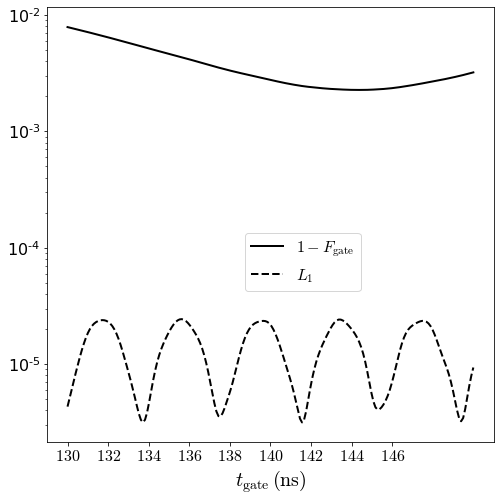

In [5]:
plot_cr_gate_time(result, save=False)

In [8]:
gate_time_list = []
infid_list = []
leak_list = []
for res in result:
    gate_time_list.append(res["gate_time"])
    infid_list.append(1 - res["gate_fid"])
    leak_list.append(res["avg_leakage"])
max_fid = 1.0 - min(infid_list)
print("Maximum gate fidelity = {}".format(max_fid))

Maximum gate fidelity = 0.9977372750167722
